# Tutoriel Analyse en Composantes Principales

[source](https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/analyses-en-composantes-principales)

Exemple basé sur le dataset Iris

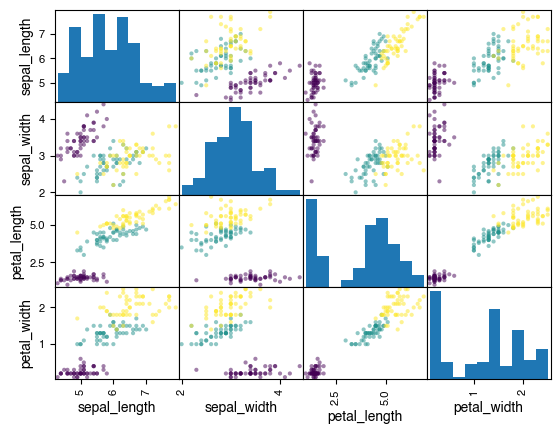

In [2]:
import seaborn as sns # nécessite le module seaborn

import matplotlib.pyplot as plt

iris = sns.load_dataset('iris') # Charger le jeu de données iris

# Les 4 colonnes de mesures qui décrivent différents iris

X = iris.iloc[:,0:4] 

colors = iris.species.astype('category')

# Les couleurs déduites de chaque espèce d'iris

y = colors.cat.codes 

from pandas.plotting import scatter_matrix

scatter_matrix(X,c=y) ; plt.show()

## Etape 1 : Centrer-réduire les valeurs (optionnel)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X=scaler.transform(X) 

## Etape 2: Réaliser l'ACP

In [6]:
from sklearn.decomposition import PCA

mypca = PCA(n_components=3) # On paramètre ici pour ne garder que 3 composantes

# Modèle d'ACP

mypca.fit(X)

# Pourcentage de la variance expliquée par chacune des composantes sélectionnées.
print("Variance expliquée :")
print(mypca.singular_values_) # Valeurs de variance
print("Variance expliquée (%):")
print(mypca.explained_variance_ratio_) #  Pourcentages

# Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.
print("Axes principaux :")
print(mypca.components_) # 

# Résultats de l'ACP

data_sortie= mypca.fit_transform(X)

# Bruit estimé lié à la covariance
print("Bruit estimé :")
print(mypca.noise_variance_)

Variance expliquée :
[20.92306556 11.7091661   4.69185798]
Variance expliquée (%):
[0.72962445 0.22850762 0.03668922]
Axes principaux :
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]]
Bruit estimé :
0.02085386217646228


## Etape 3 : Contrôler l'ACP par un diagramme de pareto

In [7]:
def pareto(data) :

    from matplotlib.ticker import PercentFormatter

    import numpy as np

    y = list(data)

    x = range(len(data))

    ycum = np.cumsum(y)/sum(y)*100

    fig, ax = plt.subplots()

    ax.bar(x,y,color="yellow")

    ax2 = ax.twinx()

    ax2.plot(x,ycum, color="C1", marker="D", ms=7)

    ax2.axhline(y=80,color="r")

    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")

    ax2.tick_params(axis="y", colors="C1")

    plt.ylim(0,110)

    plt.show()

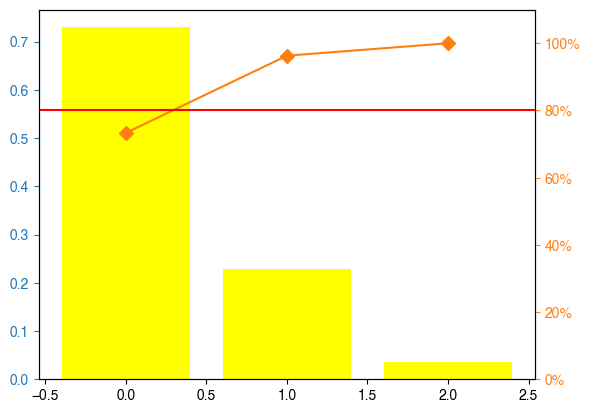

In [8]:
pareto(mypca.explained_variance_ratio_)

## Etape 4 : Visualiser les résultats de l'ACP

biplot  - graphique qui représente la projection des individus sur deux composantes sélectionnées et la corrélation des variables avec ces composantes.

In [15]:
#######################################

# biplot

# version 12/11/2021

#######################################

import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

import numpy as np

import pandas as pd

import matplotlib as mpl

import matplotlib.cm as cm

import seaborn as sns

from sklearn.decomposition import PCA

def biplot(pca=[],x=None,y=None,components=[0,1],score=None,coeff=None,coeff_labels=None,score_labels=None,circle='T',bigdata=1000,cat=None,cmap="viridis",density=True):

    if isinstance(pca,PCA)==True :

        coeff = np.transpose(pca.components_[components, :])

        score=  pca.fit_transform(x)[:,components]

        if isinstance(x,pd.DataFrame)==True :

            coeff_labels = list(x.columns)

    if score is not None : x = score

    if x.shape[1]>1 :

        xs = x[:,0]

        ys = x[:,1]

    else :

        xs = x

        ys = y

    if (len(xs) != len(ys)) : print("Warning ! x et y n'ont pas la même taille !")

    scalex = 1.0/(xs.max() - xs.min())

    scaley = 1.0/(ys.max() - ys.min())

    #x_c = xs * scalex

    #y_c = ys * scaley

    temp = (xs - xs.min())

    x_c = temp / temp.max() * 2 - 1

    temp = (ys - ys.min())

    y_c = temp / temp.max() * 2 - 1

    data = pd.DataFrame({"x_c":x_c,"y_c":y_c})

    print("Attention : pour des facilités d'affichage, les données sont centrées-réduites")

    if cat is None : cat = [0]*len(xs)

    elif len(pd.Series(cat)) == 1 : cat = list(pd.Series(cat))*len(xs)

    elif len(pd.Series(cat)) != len(xs) : print("Warning ! Nombre anormal de catégories !")

    cat = pd.Series(cat).astype("category")

    fig = plt.figure(figsize=(6,6),facecolor='w') 

    ax = fig.add_subplot(111)

    # Affichage des points

    if (len(xs) < bigdata) :   

        ax.scatter(x_c,y_c, c = cat.cat.codes,cmap=cmap)

        if density==True : print("Warning ! Le mode density actif n'apparait que si BigData est paramétré.")

    # Affichage des nappes convexes (BigData)

    else :

        #color

        norm = mpl.colors.Normalize(vmin=0, vmax=(len(np.unique(cat.cat.codes)))) #-(len(np.unique(c)))

        cmap = cmap

        m = cm.ScalarMappable(norm=norm, cmap=cmap)

        if density==True :

            sns.set_style("white")

            sns.kdeplot(x="x_c",y="y_c",data=data)

            if len(np.unique(cat)) <= 1 :

                sns.kdeplot(x="x_c",y="y_c",data=data, cmap="Blues", fill=True, thresh= 0)

            else :

                for i in np.unique(cat) :

                    color_temp = m.to_rgba(i)

                    sns.kdeplot(x="x_c",y="y_c",data=data[cat==i], color=color_temp,

                                fill=True, thresh=0.25, alpha=0.25)     

        for cat_temp in cat.cat.codes.unique() :

            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]

            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]

            points = [ [ None ] * len(x_c_temp) ] * 2

            points = np.array(points)

            points = points.reshape(len(x_c_temp),2)

            points[:,0] = x_c_temp

            points[:,1] = y_c_temp

            hull = ConvexHull(points)

            temp = 0

            for simplex in hull.simplices:

                color_temp = m.to_rgba(cat_temp)

                plt.plot(points[simplex, 0], points[simplex, 1],color=color_temp)#, linestyle='dashed')#linewidth=2,color=cat)

                if (temp == 0) :

                     plt.xlim(-1,1)

                     plt.ylim(-1,1)

                     temp = temp+1

    if coeff is not None :

        if (circle == 'T') :

            x_circle = np.linspace(-1, 1, 100)

            y_circle = np.linspace(-1, 1, 100)

            X, Y = np.meshgrid(x_circle,y_circle)

            F = X**2 + Y**2 - 1.0

            #fig, ax = plt.subplots()

            plt.contour(X,Y,F,[0])

        n = coeff.shape[0]

        for i in range(n):

            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,

                      head_width=0.05, head_length=0.05)

            if coeff_labels is None:

                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')

            else:

                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff_labels[i], color = 'g', ha = 'center', va = 'center')

        if score_labels is not None :

            for i in range(len(score_labels)) :

                temp_x = xs[i] * scalex

                temp_y = ys[i] * scaley

                plt.text(temp_x,temp_y,list(score_labels)[i])

    plt.xlim(-1.2,1.2)

    plt.ylim(-1.2,1.2)

    plt.xlabel("PC{}".format(1))

    plt.ylabel("PC{}".format(2))

    plt.grid(linestyle='--')

    plt.show()

Attention : pour des facilités d'affichage, les données sont centrées-réduites
Warning ! Le mode density actif n'apparait que si BigData est paramétré.


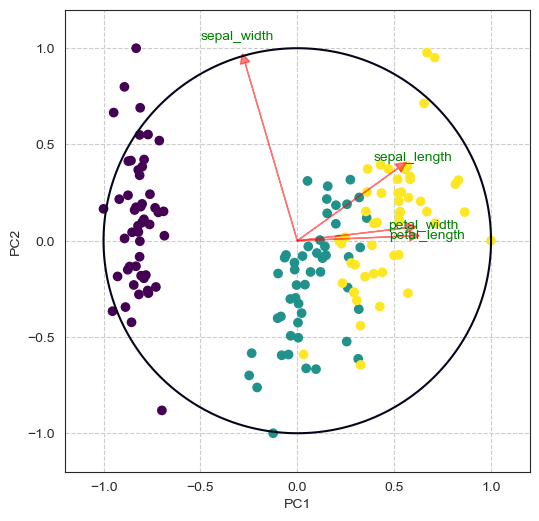

In [21]:
biplot(score=data_sortie[:,0:2],

    coeff=np.transpose(mypca.components_[0:2, :]),cat=y,
    
    coeff_labels = list(iris.columns),

    cmap="viridis")

plt.show()

Attention : pour des facilités d'affichage, les données sont centrées-réduites
Warning ! Le mode density actif n'apparait que si BigData est paramétré.


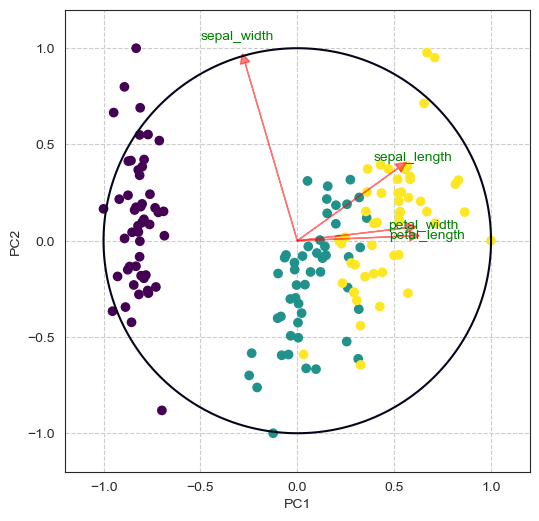

In [20]:
biplot(mypca,x=X,cat=y,components=[0,1], coeff_labels = list(iris.columns))

plt.show()

Attention : pour des facilités d'affichage, les données sont centrées-réduites


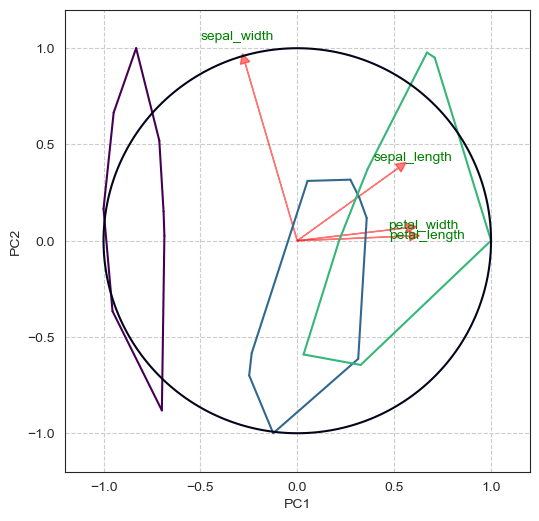

In [18]:
biplot(score=data_sortie[:,0:2],

    coeff=np.transpose(mypca.components_[0:2, :]),cat=y, bigdata=100,coeff_labels = list(iris.columns),density=False)

plt.show()

Attention : pour des facilités d'affichage, les données sont centrées-réduites


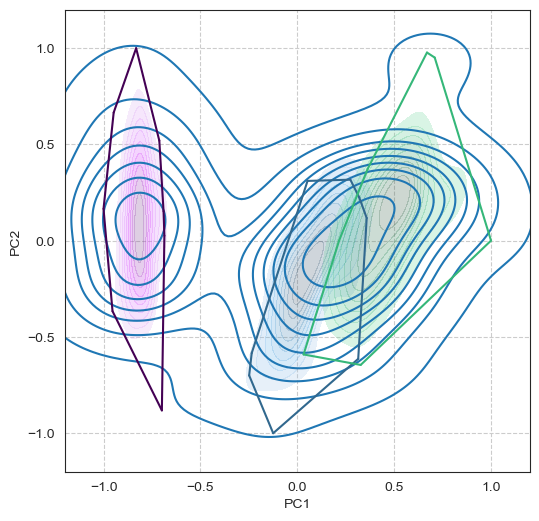

In [19]:
biplot(score=data_sortie[:,0:2],cat=y, bigdata=100,density=True)

plt.show()